# Learning Recurrent Neural Networks for sequence classification
__________________________________________

# I.  RNN for reviews sentiment classification 

## 1. Dataset to be used today : IMDB dataset



[IMDB Movie reviews sentiment classification](https://keras.io/datasets/)

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.


NB : Vous pouvez soit télécharger les données soit utiliser celles que j'ai déjà téléchargées en faisant un lien symbolique (commande ln -s) de  '/users/usrlocal/artieres/Projets/Datas/Keras_Datas/datasets/imdb_full.pkl' dans votre repertiore ~/.keras/datasets

In [88]:
# Basic preliminaries

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

%matplotlib inline
import matplotlib.pyplot as plt

### Loading the data

In [89]:
from keras.preprocessing import sequence
from keras.datasets import imdb

max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)


## 2. Using a standard RNN on IMDB dataset

### Defining the model

In [90]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM, SimpleRNN

batch_size = 32

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(SimpleRNN(100, dropout_W=0.2, dropout_U=0.2))  
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print (model.summary())

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 128)         2560000   
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 100)               22900     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_18 (Activation)   (None, 1)                 0         
Total params: 2,583,001
Trainable params: 2,583,001
Non-trainable params: 0
_________________________________________________________________
None


/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  if __name__ == '__main__':
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2)`
  # Remove the CWD from sys.path while we load stuff.


In [5]:
### Useful feature 
##3 How to generate an image of your model

from keras.utils.vis_utils import plot_model as plot
plot(model, to_file='model.png')


### To do :  

#### Explain the number of parameters in the model description

How to compute the number of parameters of all the layers from maxlen, max_features, the size of the embedding space, the size of the RNN layer. Write the formulas : 

- NbParameters(EmbeddingLayer) = NbFeatures x dim = 20 000 x 128 = 2 560 000

- NbParameters(SimpleRNNLayer) = (InputDim + 1) x dim + maxlen x dim = (128+1) x 100 + 100 x 100 = 22 900

- NbParameters(OutputLayer) = (InputDim + 1) x dim = (100 + 1) x 1 = 101

#### Learn and evaluate the model's performance
Write the code for learning and evaluate the model using usual fit and evaluate methods and the history of the learning to plot learning curves 

#### you get 30' to reach best performances with this architecture 

- Try using different optimizers and different optimizer configs, different number of cells, various batch size...
- Usually you may see very quickly if the learning curve looks like being better than what you ever seen before.

-------------------------------------------------

#### Learn and evaluate the model's performance

In [19]:
h = model.fit(X_train, y_train,
        epochs=5,
        batch_size=32,
        shuffle=True,
        validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 37s - loss: 0.4445 - acc: 0.7970 - val_loss: 0.5574 - val_acc: 0.7127
Epoch 2/5
25000/25000 [==============================] - 37s - loss: 0.4436 - acc: 0.7927 - val_loss: 0.5867 - val_acc: 0.7103
Epoch 3/5
25000/25000 [==============================] - 37s - loss: 0.3966 - acc: 0.8270 - val_loss: 0.5195 - val_acc: 0.7693
Epoch 4/5
25000/25000 [==============================] - 37s - loss: 0.3721 - acc: 0.8404 - val_loss: 0.5372 - val_acc: 0.7693
Epoch 5/5
25000/25000 [==============================] - 37s - loss: 0.3526 - acc: 0.8509 - val_loss: 0.5611 - val_acc: 0.7683


In [14]:
def plot_learning_curves(history):
    #print history.history.keys()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

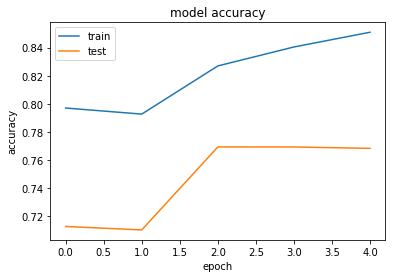

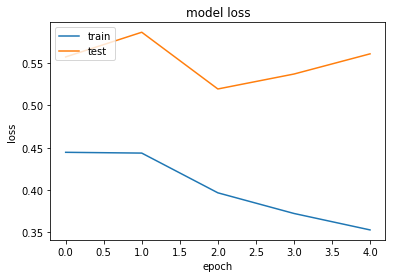

In [20]:
plot_learning_curves(h)

#### you get 30' to reach best performances with this architecture

In [91]:
from keras import optimizers

In [44]:
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(SimpleRNN(100, dropout_W=0.2, dropout_U=0.2))  
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
g = model.fit(X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_split=0.33,
        shuffle=True,
        validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 27s - loss: 0.6975 - acc: 0.5249 - val_loss: 0.6796 - val_acc: 0.5347
Epoch 2/10
25000/25000 [==============================] - 27s - loss: 0.6642 - acc: 0.5822 - val_loss: 0.6483 - val_acc: 0.6075
Epoch 3/10
25000/25000 [==============================] - 27s - loss: 0.6046 - acc: 0.6706 - val_loss: 0.6255 - val_acc: 0.6333
Epoch 4/10
25000/25000 [==============================] - 28s - loss: 0.5427 - acc: 0.7171 - val_loss: 0.5903 - val_acc: 0.6845
Epoch 5/10
25000/25000 [==============================] - 27s - loss: 0.4673 - acc: 0.7786 - val_loss: 0.5255 - val_acc: 0.7484
Epoch 6/10
25000/25000 [==============================] - 27s - loss: 0.4102 - acc: 0.8133 - val_loss: 0.5409 - val_acc: 0.7413
Epoch 7/10
25000/25000 [==============================] - 27s - loss: 0.3801 - acc: 0.8338 - val_loss: 0.5411 - val_acc: 0.7550
Epoch 8/10
25000/25000 [==============================

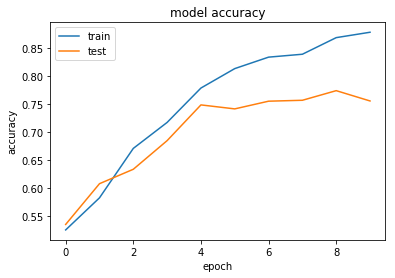

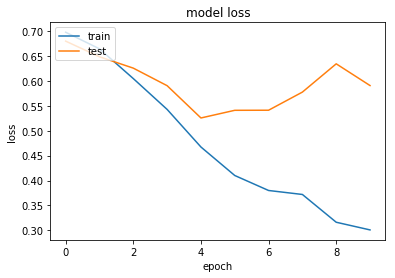

In [46]:
plot_learning_curves(g)

Après bien des essais, la meilleure configuration trouvée n'est pas bien loin du modèle proposé par défaut...
La généralisation n'est pas exceptionnelle : On trouve juste 3 fois sur 4.

## 3. Same task with LSTM units


### Defining the Recurrent LSTM model

In [92]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM

batch_size = 32

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(LSTM(100, dropout_W=0.2, dropout_U=0.2))  
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print (model.summary())

Build model...


/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  if __name__ == '__main__':
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, dropout=0.2, recurrent_dropout=0.2)`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, None, 128)         2560000   
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_19 (Activation)   (None, 1)                 0         
Total params: 2,651,701
Trainable params: 2,651,701
Non-trainable params: 0
_________________________________________________________________
None


### To do :  

#### Explain the number of parameters in the model description

How to compute the number of parameters of all the layers from maxlen, max_features, the size of the embedding space, the size of the RNN layer. Write the formulas : 

- NbParameters(EmbeddingLayer) = NbFeatures x dim = 20 000 x 128 = 2 560 000

- NbParameters(LSTMLayer) = 4 x (InputDim x dim + (dim + 1) x dim) = 4 * (128 x 100 + (100 + 1) x 100) = 91 600

- NbParameters(OutputLayer) = (InputDim + 1) x dim = (100 + 1) x 1 = 101

#### Learn and evaluate the model's performance
Write the code for learning and evaluate the model using usual fit and evaluate methods and the history of the learning to plot learning curves 


#### Comparison of RNNs

- Perform a comparison of RNNs using  Standard recurrent cells, LSTM, GRU on this task

- Report a figure with a number of points corresponding to the total number of parameters (x-axis) and to the accuray on the test set (y-axis).

------------------------------------------------------------------

#### Learn and evaluate the model's performance

In [55]:
model.fit(X_train, y_train,
        epochs=5,
        batch_size=64,
        validation_split=0.33,
        shuffle=True,
        validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 70s - loss: 0.4123 - acc: 0.8177 - val_loss: 0.3601 - val_acc: 0.8438
Epoch 2/5
25000/25000 [==============================] - 67s - loss: 0.2937 - acc: 0.8836 - val_loss: 0.3772 - val_acc: 0.8330
Epoch 3/5
25000/25000 [==============================] - 68s - loss: 0.2138 - acc: 0.9203 - val_loss: 0.4633 - val_acc: 0.8148
Epoch 4/5
25000/25000 [==============================] - 68s - loss: 0.1634 - acc: 0.9399 - val_loss: 0.4395 - val_acc: 0.8334
Epoch 5/5
25000/25000 [==============================] - 68s - loss: 0.1190 - acc: 0.9561 - val_loss: 0.5050 - val_acc: 0.8330


In [57]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.505032849798
Test accuracy: 0.83304


#### With GRU

In [58]:
from keras.layers import GRU

batch_size = 32

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128, dropout=0.2))
model.add(GRU(100, dropout_W=0.2, dropout_U=0.2))  
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


print (model.summary())

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 128)         2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               68700     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_15 (Activation)   (None, 1)                 0         
Total params: 2,628,801
Trainable params: 2,628,801
Non-trainable params: 0
_________________________________________________________________
None


/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  import sys
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(100, dropout=0.2, recurrent_dropout=0.2)`
  


In [59]:
model.fit(X_train, y_train,
        epochs=5,
        batch_size=64,
        validation_split=0.33,
        shuffle=True,
        validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 61s - loss: 0.4783 - acc: 0.7684 - val_loss: 0.3916 - val_acc: 0.8302
Epoch 2/5
25000/25000 [==============================] - 60s - loss: 0.3232 - acc: 0.8671 - val_loss: 0.3639 - val_acc: 0.8446
Epoch 3/5
25000/25000 [==============================] - 61s - loss: 0.2357 - acc: 0.9086 - val_loss: 0.4201 - val_acc: 0.8264
Epoch 4/5
25000/25000 [==============================] - 61s - loss: 0.1634 - acc: 0.9404 - val_loss: 0.4387 - val_acc: 0.8367
Epoch 5/5
25000/25000 [==============================] - 60s - loss: 0.1073 - acc: 0.9631 - val_loss: 0.5005 - val_acc: 0.8290


In [60]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.500490460186
Test accuracy: 0.82896


#### Comparison of RNNs

TypeError: 'str' object is not callable

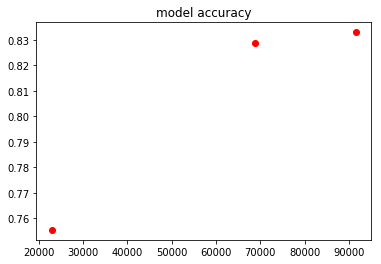

In [94]:
params = [22900, 91600, 68700]
acc = [0.75541, 0.83304, 0.82896]
plt.plot([params], [acc], 'ro')
plt.title('model accuracy')
plt.xlabel('params card')
plt.ylabel('accuracy')
plt.show()

## 4. RNN + convolution

- The following model includes a 1D convolutional layer before the LSTM layer, followed by a 1D maxpooling layer.

- Look at the keras documentations about these layers and guess the output dimensions of the layers of the model below.




In [93]:

from keras.layers import Convolution1D, MaxPooling1D, Dropout

embedding_size = 128
max_features = 20000
maxlen = 100

# Convolution
filter_length = 5
nb_filter = 16
pool_length = 4

# LSTM
lstm_output_size = 50

# Training
batch_size = 30
nb_epoch = 2

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
model.add(MaxPooling1D(pool_length=pool_length))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print (model.summary())

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 100, 128)          2560000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 96, 16)            10256     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 24, 16)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                13400     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
_________________________________________________________________
activation_20 (Activation)   (None, 1)                 0     

/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="valid", strides=1, filters=16, kernel_size=5)`
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=4)`


### To do 

#### Explain the number of parameters in the model description

How to compute the number of parameters of the RNNs as a function of all the quantities from which it is built. Write the formulas : 

- NbParameters(EmbeddingLayer) = max_features x embedding_size = 128 * 2 000 = 2 560 000

- NbParameters(Convolution1DLayer) = InputDim x nb_filter x filter_length + nb_filters = 128 x 16 x 5 + 16 = 10256 

- NbParameters(LSTMLayer) = 4 x (InputDim x dim + (dim + 1) x dim)

- NbParameters(OutputLayer) = (InputDim + 1) x dim

#### Compare these models with previous ones

Do these convoltional LSTM models outperfom LSTM (meaning the best of the Convolutuinal LSTM models beats the best of the LSTM models) ?



In [85]:
model.fit(X_train, y_train,
        epochs=5,
        batch_size=64,
        validation_split=0.33,
        shuffle=True,
        validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 19s - loss: 0.4173 - acc: 0.7981 - val_loss: 0.3343 - val_acc: 0.8548
Epoch 2/5
25000/25000 [==============================] - 19s - loss: 0.2102 - acc: 0.9184 - val_loss: 0.3336 - val_acc: 0.8539
Epoch 3/5
25000/25000 [==============================] - 19s - loss: 0.1051 - acc: 0.9641 - val_loss: 0.4846 - val_acc: 0.8406
Epoch 4/5
25000/25000 [==============================] - 19s - loss: 0.0447 - acc: 0.9858 - val_loss: 0.4704 - val_acc: 0.8406
Epoch 5/5
25000/25000 [==============================] - 19s - loss: 0.0215 - acc: 0.9933 - val_loss: 0.6915 - val_acc: 0.8344
Test score: 0.691485763662
Test accuracy: 0.8344


This model barely outperforms the one without convolutioning.

# II. Get your best results on motion capture datas


## Motion capture data

The Emilya dataset is a database of motion capture data of actors performing daily activities under specific emotion. There were 11 actors, 8 emotions, 8 activities. 

- The actors were eleven (6 females and 5 males) graduate students. The mean age was 26 ranging from 23 to 28.

- The activities are : walking,
sitting down, knocking at the door, lifting and throwing objects
(a piece of paper) with one hand, and moving objects
(books) on a table with two hands. For the walking actions,
 the actors were asked to walk back and forth along the long
side of the room. Walking was divided into a simple walk
and a walk with an object in hand to capture two types of
arms behavior during walking action. 

- The emotions are : Joy, Anger, Panic Fear, Anxiety, Sadness, Shame, Pride and Neutral. 

- Acquiring and processing data : 17 sensors were used to capture the movements of 23 body segments. The orientation and the position information
are obtained for each body joint. These values are transformed into three joint angles per body segment so that the posture at time t of an actor is represented as a feature vector of size 69. One motion sequence is then a sequence of 69 dimensional feature vectors, called frames, with a rate of 120 frames per second.


## To do

- Design and learn recurrent models for activity recognition from motion capture sequences

- You may load the data with the code below, provided the file MotionCaptureData.py is in your repository





In [98]:
%run MotionCaptureData.py

print (motion_data_train.shape, motion_data_test.shape, target_train.shape, target_test.shape, emotion_data_train.shape, emotion_data_test.shape)

(7582, 100, 72) (843, 100, 72) (7582, 8) (843, 8) (7582, 100) (843, 100)


In [114]:
maxlen = 100
nb_activities = 8

# Convolution
filter_length = 5
nb_filter = 64
pool_length = 4

# LSTM
lstm_output_size = 512

# Training
batch_size = 32
nb_epoch = 5

print('Build model...')

model = Sequential()
model.add(Convolution1D(input_shape = (100, 72),
                        nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))

model.add(MaxPooling1D(pool_length=pool_length))
model.add(LSTM(lstm_output_size))
model.add(Dense(nb_activities))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print (model.summary())


Build model...


/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", input_shape=(100, 72), padding="valid", strides=1, filters=64, kernel_size=5)`
/users/usrlocal/artieres/.Virtualenvs/ENV2.7/lib/python2.7/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=4)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 96, 64)            23104     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 512)               1181696   
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 4104      
_________________________________________________________________
activation_26 (Activation)   (None, 8)                 0         
Total params: 1,208,904
Trainable params: 1,208,904
Non-trainable params: 0
_________________________________________________________________
None


In [115]:
model.fit(motion_data_train, target_train,
        epochs=5,
        batch_size=batch_size,
        validation_split=0.33,
        shuffle=True,
        validation_data=(motion_data_test, target_test))

Train on 7582 samples, validate on 843 samples
Epoch 1/5
7582/7582 [==============================] - 28s - loss: 0.1683 - acc: 0.9297 - val_loss: 0.1271 - val_acc: 0.9483
Epoch 2/5
7582/7582 [==============================] - 28s - loss: 0.1086 - acc: 0.9542 - val_loss: 0.1004 - val_acc: 0.9595
Epoch 3/5
7582/7582 [==============================] - 28s - loss: 0.0875 - acc: 0.9635 - val_loss: 0.0962 - val_acc: 0.9594
Epoch 4/5
7582/7582 [==============================] - 29s - loss: 0.0761 - acc: 0.9684 - val_loss: 0.0830 - val_acc: 0.9647
Epoch 5/5
7582/7582 [==============================] - 29s - loss: 0.0706 - acc: 0.9705 - val_loss: 0.0852 - val_acc: 0.9675


In [116]:
score = model.evaluate(motion_data_test, target_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0852193552758
Test accuracy: 0.967526690179


Plusieurs essais non-concluants quant à l'intégration des émotions...

https://keras.io/models/model/